<a href="https://colab.research.google.com/github/camilla8989/pythonstudy/blob/main/World_Population_Distribution_in_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from pandas_datareader import wb

# Obtain the population data of each country, "SP.POP.TOTL" is the population index of the World Bank
df = wb.download(indicator='SP.POP.TOTL', country='all', start=2021, end=2021)

print(df)
df.to_csv('output.csv', index=True)

                                     SP.POP.TOTL
country                        year             
Africa Eastern and Southern    2021  702976832.0
Africa Western and Central     2021  478185907.0
Arab World                     2021  456520777.0
Caribbean small states         2021    7481877.0
Central Europe and the Baltics 2021  101430997.0
...                                          ...
Virgin Islands (U.S.)          2021     105870.0
West Bank and Gaza             2021    4922749.0
Yemen, Rep.                    2021   32981641.0
Zambia                         2021   19473125.0
Zimbabwe                       2021   15993524.0

[266 rows x 1 columns]


In [ ]:
!pip install pandas geopandas matplotlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

In [40]:
! pip install fuzzywuzzy[speedup]
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pandas as pd

# read CSV file
df_output = pd.read_csv('output.csv')

# Make sure the country column is a string type
df_output['country'] = df_output['country'].astype(str)

# Create a new column to hold the matching names
df_output['matched_name'] = ''

# Iterate over each row and find the name that best matches output['country'] in world['name']
for i, row in df_output.iterrows():
    # Use fuzzywuzzy to find the best matching name
    match = process.extractOne(row['country'], world['name'].tolist())
    
    # Only when the matching score is greater than 90, we consider it a match
    if match[1] > 90:
        df_output.at[i, 'matched_name'] = match[0]

# Merge world and df_output by matching names
df_merged = pd.merge(df_output, world, left_on='matched_name', right_on='name')

# Keep only the columns we need
df_final = df_merged[['matched_name', 'SP.POP.TOTL']]

# Output
df_final.to_csv('data.csv', index=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


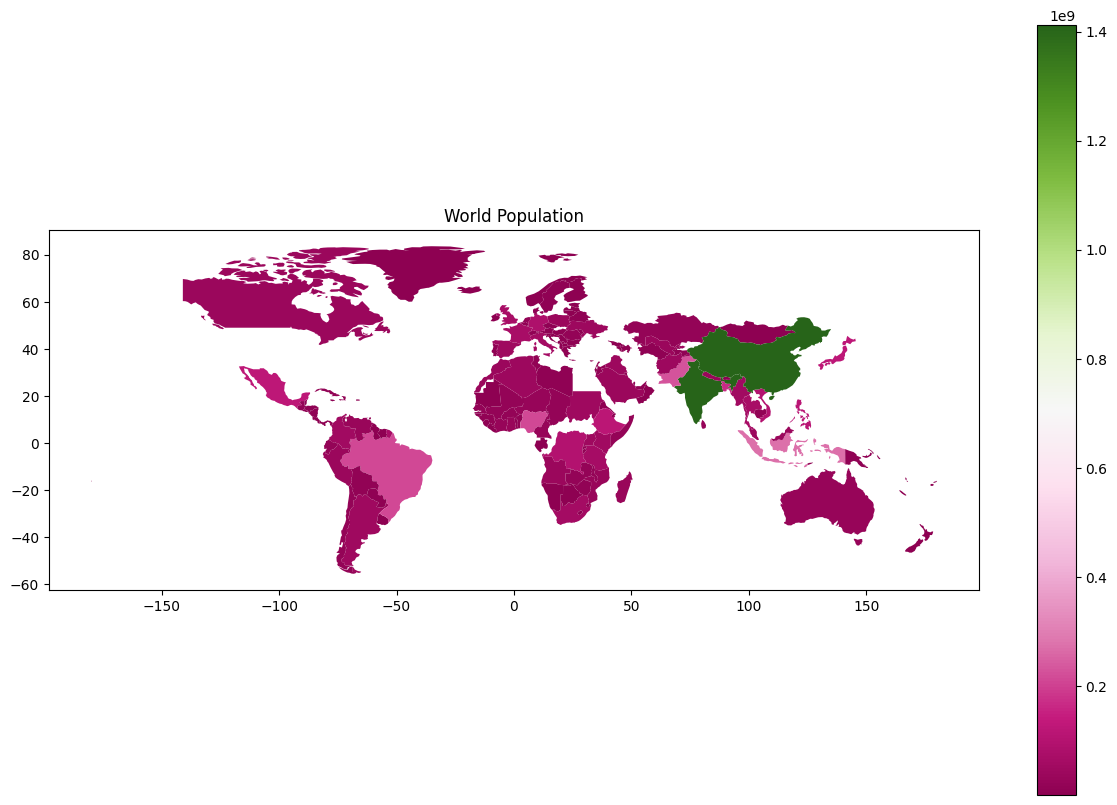

In [43]:
! pip install geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# read CSV file
data = pd.read_csv('data.csv')

# Capitalize country names to match world map data
world['name'] = world['name'].str.upper()
data['matched_name'] = data['matched_name'].str.upper()

# Combine shapefile data and population data using country names
merged = world.set_index('name').join(data.set_index('matched_name'))

# draw a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='SP.POP.TOTL', ax=ax, legend=True, cmap='PiYG')
plt.title('World Population')
plt.show()
